In [1]:
import os
import pandas as pd
from utils import stem
import json

[nltk_data] Downloading package stopwords to /home/vlad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
PARENT_PATH = os.path.join("..")
DATASET_CSV = os.path.join(PARENT_PATH, "data", "analyzed.csv")
RESULT_CSV = os.path.join(PARENT_PATH, "data", "prepared.csv")
TAGS_TXT = os.path.join(PARENT_PATH, "data", "tags.txt")

In [3]:
with open(TAGS_TXT, 'r') as fr:
    TAGS = json.load(fr)

In [4]:
df_prepare = pd.read_csv(DATASET_CSV, index_col=0)

In [5]:
df_prepare.head()

,text_stem,tags,javascript,android,php,java,linux,python,программирование,разработка,...,c++,microsoft,.net,информационная безопасность,стартапы,c#,css,apple,игры,open source
2,уважа пользовател хабр сегодн компан мтт хотел...,"youmagic,ip-телефония,мтт,softphone,linux,windows",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,улучшен user experience повышен юзабилит серви...,"юзабилити,проектирование интерфейсов,ecommerce...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,привет хабралюд зна forex пыта сих пор пыта не...,"forex,трейдинг,механическая торговля,эксперт",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,рискн продолж ден занимательн экономик хабре… ...,"занимательная экономика,экономика,поведение,но...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,напомн микрософт собира анонсирова нов ос моби...,"microsoft,windows phone 7,слухи,бред,может и п...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df_prepare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118872 entries, 2 to 203774
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  118872 non-null  object
 1   tags     118872 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [9]:
%%time
df_prepare["text_stem"] = df_prepare[["content"]].apply(lambda row: stem(row["content"]), axis=1)

CPU times: user 13min 38s, sys: 2.42 s, total: 13min 41s
Wall time: 13min 41s


In [10]:
def has_tag(tags_data, tag):
    tags = tags_data.strip("[]").replace("'", "").split(',')
    if tag in tags:
        return 1
    else:
        return 0

In [11]:
df = df_prepare[["text_stem", "tags"]].dropna()

In [12]:
for tag in TAGS:
    df[tag] = df[["tags"]].apply(lambda row: has_tag(row["tags"], tag), axis=1)

In [9]:
df.info()

NameError: name 'df' is not defined

In [18]:
df.head()

,text_stem,tags,javascript,android,php,java,linux,python,программирование,разработка,...,c++,microsoft,.net,информационная безопасность,стартапы,c#,css,apple,игры,open source
2,уважа пользовател хабр сегодн компан мтт хотел...,"youmagic,ip-телефония,мтт,softphone,linux,windows",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,улучшен user experience повышен юзабилит серви...,"юзабилити,проектирование интерфейсов,ecommerce...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,привет хабралюд зна forex пыта сих пор пыта не...,"forex,трейдинг,механическая торговля,эксперт",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,рискн продолж ден занимательн экономик хабре… ...,"занимательная экономика,экономика,поведение,но...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,напомн микрософт собира анонсирова нов ос моби...,"microsoft,windows phone 7,слухи,бред,может и п...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
len(df)

118872

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/vlad/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


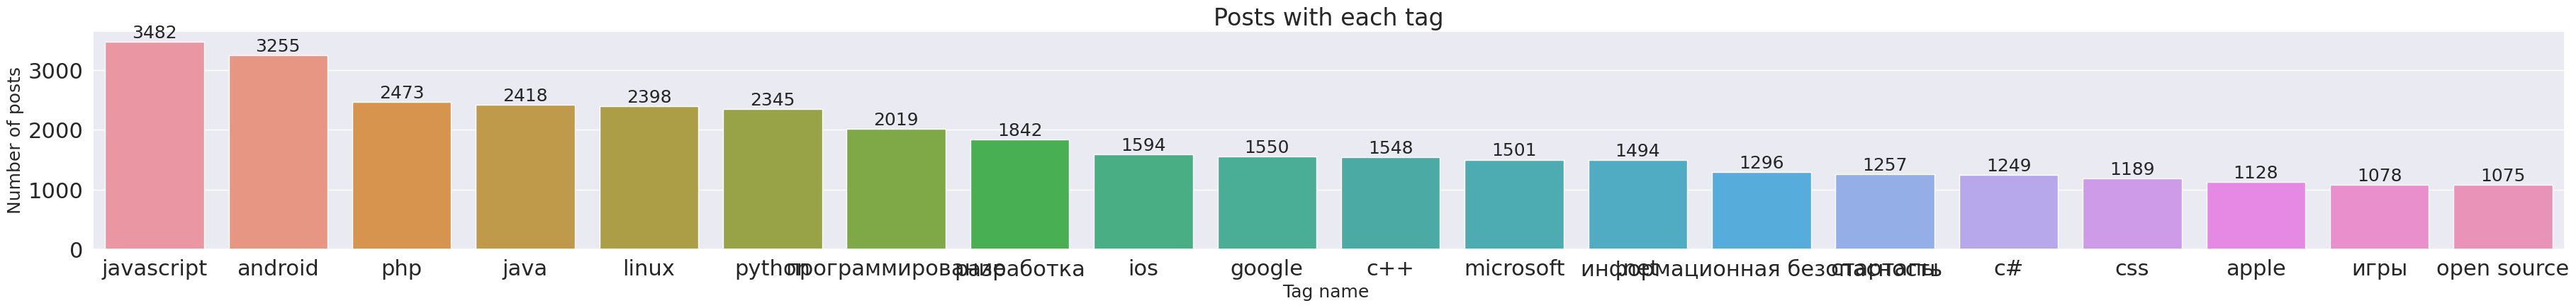

In [20]:
categories = list(df.columns.values)[2:]
sns.set(font_scale = 2)
plt.figure(figsize=(45,4))
ax= sns.barplot(categories, df.iloc[:,2:].sum().values)
plt.title("Posts with each tag", fontsize=24)
plt.ylabel('Number of posts', fontsize=18)
plt.xlabel('Tag name ', fontsize=18)

rects = ax.patches
labels = df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

/home/vlad/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


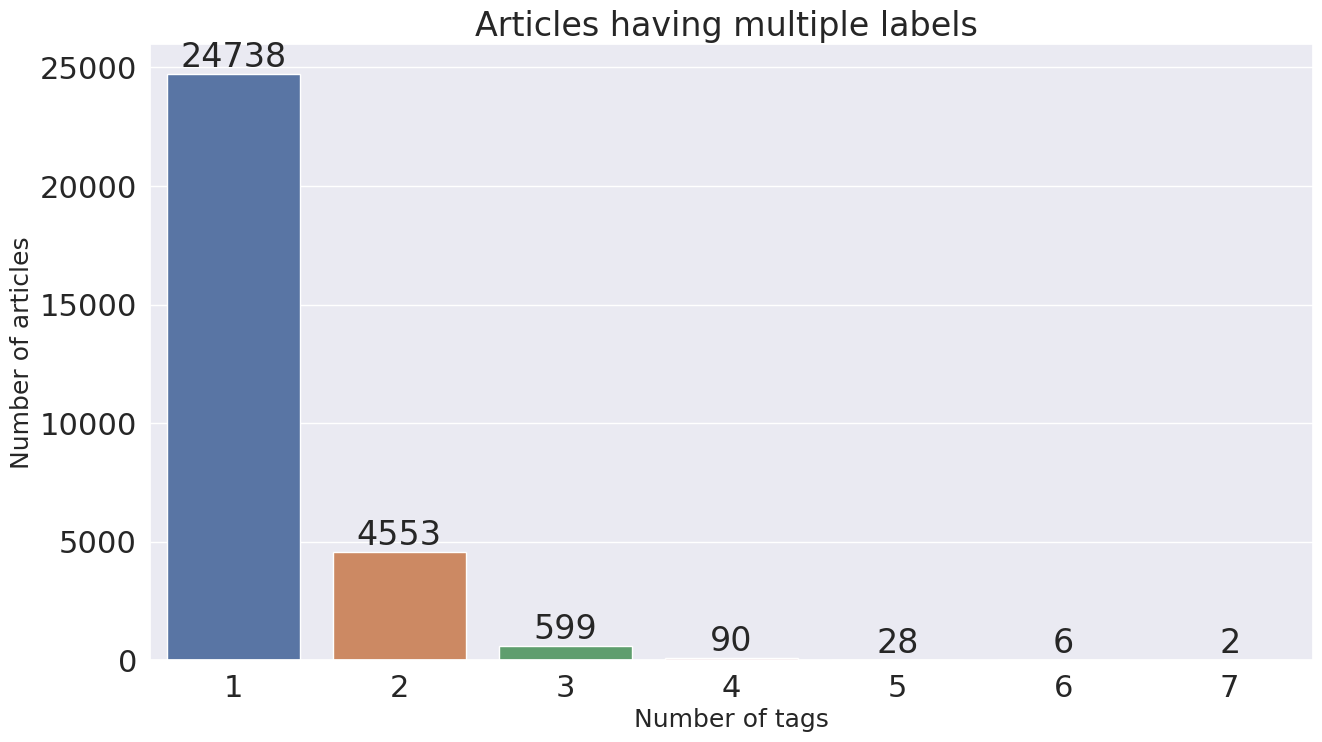

In [27]:
rowSums = df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Articles having multiple labels ")
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Number of tags', fontsize=18)

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [22]:
df.to_csv(RESULT_CSV)

In [26]:
df = df.dropna()

In [13]:
df.to_csv(RESULT_CSV)

Удаление пустых

In [10]:
df_prepare.columns

Index(['text_stem', 'tags', 'javascript', 'android', 'php', 'java', 'linux',
       'python', 'программирование', 'разработка', 'ios', 'google', 'c++',
       'microsoft', '.net', 'информационная безопасность', 'стартапы', 'c#',
       'css', 'apple', 'игры', 'open source'],
      dtype='object')

In [12]:
df = df_prepare.loc[df_prepare[['javascript', 'android', 'php', 'java', 'linux',
       'python', 'программирование', 'разработка', 'ios', 'google', 'c++',
       'microsoft', '.net', 'информационная безопасность', 'стартапы', 'c#',
       'css', 'apple', 'игры', 'open source']].sum(axis=1) > 0]